In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
# Check missing data
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
_id           0
orX           0
orY           0
orZ           0
rX            0
rY            0
rZ            0
accX          0
accY          0
accZ          0
gX            0
gY            0
gZ            0
mX            0
mY            0
mZ            0
lux           0
soundLevel    0
activity      0
dtype: int64


In [4]:
df.head()

,_id,orX,orY,orZ,rX,rY,rZ,accX,accY,accZ,gX,gY,gZ,mX,mY,mZ,lux,soundLevel,activity
0,1,125,-17,2,0.070997,-0.131696,-0.877469,-0.038307,2.68151,8.65743,-0.041316,2.67655,8.64271,-31.2,-35.6,-37.6,5000,49.56,Sitting
1,2,126,-17,2,0.071486,-0.131480,-0.878024,-0.038307,2.68151,8.65743,-0.054196,2.67834,8.64654,-31.2,-36.0,-37.2,5000,53.38,Sitting
2,3,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,53.38,Sitting
3,4,127,-17,2,0.071401,-0.131551,-0.878799,0.153229,2.68151,8.65743,-0.056867,2.68004,8.65088,-31.2,-36.0,-37.2,5000,49.53,Sitting
4,5,127,-17,2,0.070772,-0.131888,-0.879645,0.153229,2.68151,8.65743,-0.049128,2.68130,8.65458,-31.2,-35.6,-36.8,5000,49.53,Sitting


In [5]:
# Data cleaning (handling missing data)
df = df.dropna()

In [6]:
# Descriptive statistical analysis
selected_variables = ['orX','orY','orZ','rX','rY','rZ','accX','accY','accZ','gX','gY','gZ','mX','mY','mZ']
selected_data = df[selected_variables]
descriptive_stats = selected_data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                 orX            orY            orZ             rX  \
count  205520.000000  205520.000000  205520.000000  205520.000000   
mean      189.455094       2.726547       0.414120      -0.017598   
std        80.359907      22.446067      12.438395       0.148930   
min         0.000000    -178.000000     -86.000000      -0.712191   
25%       139.000000      -3.000000      -3.000000      -0.094141   
50%       186.000000       6.000000      -1.000000      -0.027313   
75%       268.000000      18.000000       3.000000       0.018465   
max       359.000000     169.000000      88.000000       0.804160   

                  rY             rZ           accX           accY  \
count  205520.000000  205520.000000  205520.000000  205520.000000   
mean       -0.011672       0.038061       0.095601      -0.973535   
std         0.113509       0.791781       1.948063       2.484468   
min        -0.556955      -0.999912     -19.536700     -14.480100   
25%      

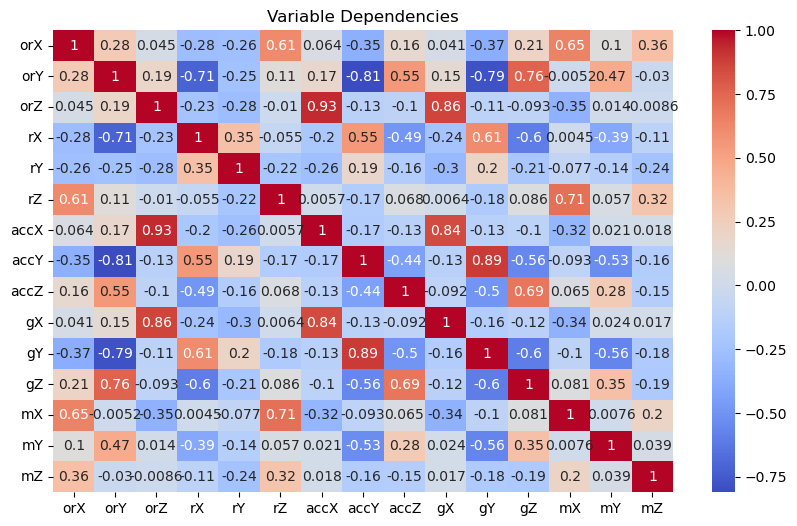

In [7]:
# Variable dependencies
plt.figure(figsize=(10, 6))
sns.heatmap(df[selected_variables].corr(), annot=True, cmap='coolwarm')
plt.title("Variable Dependencies")
plt.show()

In [8]:
# plt.figure(figsize=(10, 6))
# sns.pairplot(df[selected_variables])
# plt.title("Pairplot of Selected Variables")
# plt.show()

In [31]:
for col in data.columns:
    print(col)

orX
orY
orZ
activity


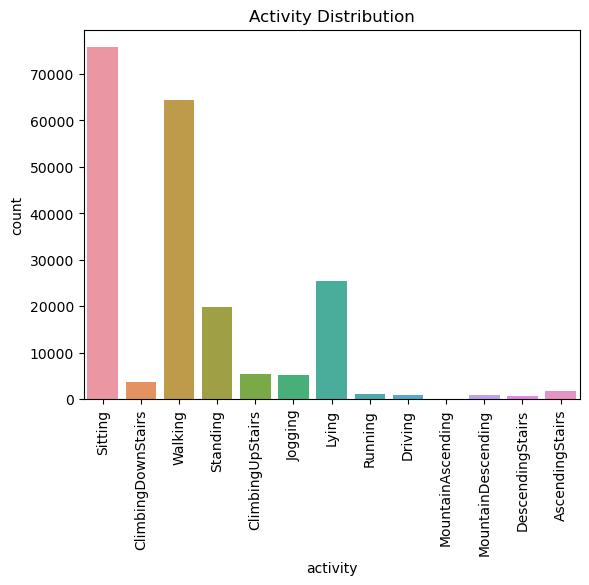

In [9]:
# Class distribution
class_counts = df['activity'].value_counts()
plt.figure()
sns.countplot(data=df, x='activity')
plt.xticks(rotation='vertical')

plt.title("Activity Distribution")
plt.show()

In [10]:
df['activity'] = pd.factorize(df['activity'])[0]

orX
orY
orZ
activity


In [11]:
# Addressing class imbalance with SMOTE oversampling
# using Smote function 
# from imblearn.over_sampling import SMOTE
# x = df[['orX','orY','orZ', 'rX','rY','rZ','accX','accY','accZ','gX','gY','gZ','mX','mY','mZ']]
# y= df['activity']
# smote = SMOTE(random_state=42)
# x,y = smote.fit_resample(x,y)

In [12]:

# # Report the resampled class distribution
# resampled_activity_counts = np.bincount(y_train_resampled)
# print("Resampled Activity Distribution:")
# for i, count in enumerate(resampled_activity_counts):
#     print(f"Class {i}: {count}")

In [13]:
#orientation,rotation, accelerometer, gyroscope, and magnetic sensors

In [14]:
or1=df[['orX','orY','orZ']]

In [15]:
or1.head()

,orX,orY,orZ
0,125,-17,2
1,126,-17,2
2,127,-17,2
3,127,-17,2
4,127,-17,2


In [16]:
# using Smote function 
from imblearn.over_sampling import SMOTE
orientation=or1[['orX','orY','orZ']]
y= df['activity']
smote = SMOTE(random_state=42)
orientation,y = smote.fit_resample(orientation,y)

In [17]:
print("Orientation shape:", orientation.shape)
print("y shape:", y.shape)


Orientation shape: (984529, 3)
y shape: (984529,)


In [18]:

# Assuming orientation and y have the same number of rows
data = pd.concat([orientation, y], axis=1)


In [19]:
data.head()

,orX,orY,orZ,activity
0,125,-17,2,0
1,126,-17,2,0
2,127,-17,2,0
3,127,-17,2,0
4,127,-17,2,0


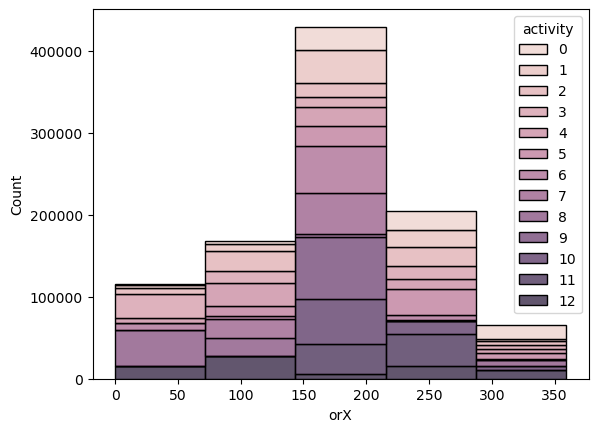

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data, x='orX', hue='activity', multiple='stack',bins=5)
plt.show()


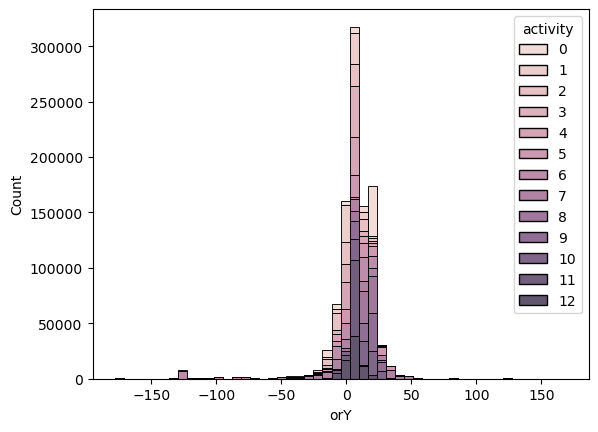

In [21]:
sns.histplot(data=data, x='orY', hue='activity', multiple='stack',bins=50)
plt.show()

In [ ]:
sns.histplot(data=data, x='orZ', hue='activity', multiple='stack')
plt.show()

In [ ]:
# Split the dataset into training and test sets (already cleaned and preprocessed)
or_train, or_test, y_train, y_test = train_test_split(orientation, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


# # Build classification models
# svm_model = SVC()
# rf_model = RandomForestClassifier()
# mlp_model = MLPClassifier()

# # Train the models
# svm_model.fit(or_train, y_train)
# rf_model.fit(or_train, y_train)
# mlp_model.fit(or_train, y_train)

# # Evaluate the models
# svm_predictions = svm_model.predict(or_test)
# rf_predictions = rf_model.predict(or_test)
# mlp_predictions = mlp_model.predict(or_test)

# # Compute confusion matrices
# svm_cm = confusion_matrix(y_test, svm_predictions)
# rf_cm = confusion_matrix(y_test, rf_predictions)
# mlp_cm = confusion_matrix(y_test, mlp_predictions)

# # Print confusion matrices
# print("Support Vector Machine Confusion Matrix:")
# print(svm_cm)
# print("\nRandom Forest Confusion Matrix:")
# print(rf_cm)
# print("\nMulti-Layer Perceptron Confusion Matrix:")
# print(mlp_cm)

# # Compute classification reports
# svm_report = classification_report(y_test, svm_predictions)
# rf_report = classification_report(y_test, rf_predictions)
# mlp_report = classification_report(y_test, mlp_predictions)

# # Print classification reports
# print("Support Vector Machine Classification Report:")
# print(svm_report)
# print("\nRandom Forest Classification Report:")
# print(rf_report)
# print("\nMulti-Layer Perceptron Classification Report:")
# print(mlp_report)


In [ ]:
# # Build classification models
svm_model = SVC()
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier()

In [ ]:
#random forest
rf_model.fit(or_train, y_train)

In [ ]:
# # Train the models SVM
#svm_model.fit(or_train, y_train)

In [ ]:
# # Train the models SVM
#mlp_model.fit(or_train, y_train)

In [ ]:
# Evaluate the models
#svm_predictions = svm_model.predict(or_test)
rf_predictions = rf_model.predict(or_test)
#mlp_predictions = mlp_model.predict(or_test)

# Compute confusion matrices
#svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
#mlp_cm = confusion_matrix(y_test, mlp_predictions)

# Print confusion matrices
#print("Support Vector Machine Confusion Matrix:")
#print(svm_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
#print("\nMulti-Layer Perceptron Confusion Matrix:")
#print(mlp_cm)

# Compute classification reports
#svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)
#mlp_report = classification_report(y_test, mlp_predictions)

# Print classification reports
#print("Support Vector Machine Classification Report:")
#print(svm_report)
print("\nRandom Forest Classification Report:")
print(rf_report)
#print("\nMulti-Layer Perceptron Classification Report:")
#print(mlp_report)


In [ ]:
#rotation
rot1=df[['rX','rY','rZ']]

In [ ]:
rot1.head()

In [ ]:
# using Smote function 
from imblearn.over_sampling import SMOTE
rotation=rot1[['rX','rY','rZ']]
y= df['activity']
smote = SMOTE(random_state=42)
rotation,y = smote.fit_resample(rotation,y)

In [ ]:
print("rotation shape:", rotation.shape)
print("y shape:", y.shape)

In [ ]:
# Assuming orientation and y have the same number of rows
data_rot = pd.concat([rotation, y], axis=1)


In [ ]:
data_rot.head()

In [ ]:
sns.histplot(data=data_rot, x='rX', hue='activity', multiple='stack')
plt.show()


In [ ]:
sns.histplot(data=data_rot, x='rY', hue='activity', multiple='stack')
plt.show()


In [ ]:
sns.histplot(data=data_rot, x='rZ', hue='activity', multiple='stack')
plt.show()


In [ ]:
# Split the dataset into training and test sets (already cleaned and preprocessed)
rot_train, rot_test, y_train, y_test = train_test_split(rotation, y, test_size=0.2, random_state=42)



In [ ]:
# Build classification models
svm_model = SVC()
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier()

# Train the models
#svm_model.fit(rot_train, y_train)
rf_model.fit(rot_train, y_train)
#mlp_model.fit(rot_train, y_train)

# Evaluate the models
#svm_predictions = svm_model.predict(rot_test)
rf_predictions = rf_model.predict(rot_test)
#mlp_predictions = mlp_model.predict(rot_test)

# Compute confusion matrices
#svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
#mlp_cm = confusion_matrix(y_test, mlp_predictions)

# Print confusion matrices
print("Support Vector Machine Confusion Matrix:")
#print(svm_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nMulti-Layer Perceptron Confusion Matrix:")
#print(mlp_cm)

# Compute classification reports
#svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)
#mlp_report = classification_report(y_test, mlp_predictions)

# Print classification reports
print("Support Vector Machine Classification Report:")
#print(svm_report)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("\nMulti-Layer Perceptron Classification Report:")
#print(mlp_report)

In [ ]:
#accelerometer
acc1=df[['accX','accY','accZ']]
acc1.head()

In [ ]:
# using Smote function 
from imblearn.over_sampling import SMOTE
accel=acc1[['accX','accY','accZ']]
y= df['activity']
smote = SMOTE(random_state=42)
accel,y = smote.fit_resample(accel,y)

In [ ]:
## fill the space after execution

In [ ]:
# Split the dataset into training and test sets (already cleaned and preprocessed)
acc_train, acc_test, y_train, y_test = train_test_split(accel, y, test_size=0.2, random_state=42)


In [ ]:
# Build classification models
svm_model = SVC()
rf_model = RandomForestClassifier()
mlp_model = MLPClassifier()

# Train the models
#svm_model.fit(acc_train, y_train)
rf_model.fit(acc_train, y_train)
#mlp_model.fit(acc_train, y_train)

# Evaluate the models
#svm_predictions = svm_model.predict(acc_test)
rf_predictions = rf_model.predict(acc_test)
#mlp_predictions = mlp_model.predict(acc_test)

# Compute confusion matrices
#svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
#mlp_cm = confusion_matrix(y_test, mlp_predictions)

# Print confusion matrices
print("Support Vector Machine Confusion Matrix:")
#print(svm_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nMulti-Layer Perceptron Confusion Matrix:")
#print(mlp_cm)

# Compute classification reports
#svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)
#mlp_report = classification_report(y_test, mlp_predictions)

# Print classification reports
print("Support Vector Machine Classification Report:")
#print(svm_report)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("\nMulti-Layer Perceptron Classification Report:")
#print(mlp_report)

In [ ]:
#gyroscope,
gy1=df[['gX','gY','gZ']]
gy1.head()

In [ ]:
# using Smote function 
from imblearn.over_sampling import SMOTE
gyr=gy1[['gX','gY','gZ']]
y= df['activity']
smote = SMOTE(random_state=42)
gyr,y = smote.fit_resample(gyr,y)

In [ ]:
## fill the space after execution

In [ ]:
# Split the dataset into training and test sets (already cleaned and preprocessed)
gy_train, gy_test, y_train, y_test = train_test_split(gyr, y, test_size=0.2, random_state=42)


In [ ]:
# Build classification models
#svm_model = SVC()
rf_model = RandomForestClassifier()
#mlp_model = MLPClassifier()

# Train the models
#svm_model.fit(gy_train, y_train)
rf_model.fit(gy_train, y_train)
#mlp_model.fit(gy_train, y_train)

# Evaluate the models
#svm_predictions = svm_model.predict(gy_test)
rf_predictions = rf_model.predict(gy_test)
#mlp_predictions = mlp_model.predict(gy_test)

# Compute confusion matrices
#svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
#mlp_cm = confusion_matrix(y_test, mlp_predictions)

# Print confusion matrices
print("Support Vector Machine Confusion Matrix:")
#print(svm_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nMulti-Layer Perceptron Confusion Matrix:")
#print(mlp_cm)

# Compute classification reports
#svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)
#mlp_report = classification_report(y_test, mlp_predictions)

# Print classification reports
print("Support Vector Machine Classification Report:")
#print(svm_report)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("\nMulti-Layer Perceptron Classification Report:")
#print(mlp_report)

In [ ]:
# and magnetic sensors
ma1=df[['mX','mY','mZ']]
ma1.head()

In [ ]:
# using Smote function 
from imblearn.over_sampling import SMOTE
mag=ma1[['mX','mY','mZ']]
y= df['activity']
smote = SMOTE(random_state=42)
mag,y = smote.fit_resample(mag,y)

In [ ]:
## fill the space after execution

In [ ]:
m_train, m_test, y_train, y_test = train_test_split(mag, y, test_size=0.2, random_state=42)


In [ ]:
# Build classification models
#svm_model = SVC()
rf_model = RandomForestClassifier()
#mlp_model = MLPClassifier()

# Train the models
#svm_model.fit(m_train, y_train)
rf_model.fit(m_train, y_train)
#mlp_model.fit(m_train, y_train)

# Evaluate the models
#svm_predictions = svm_model.predict(m_test)
rf_predictions = rf_model.predict(m_test)
#mlp_predictions = mlp_model.predict(m_test)

# Compute confusion matrices
#svm_cm = confusion_matrix(y_test, svm_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
#mlp_cm = confusion_matrix(y_test, mlp_predictions)

# Print confusion matrices
print("Support Vector Machine Confusion Matrix:")
#print(svm_cm)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
print("\nMulti-Layer Perceptron Confusion Matrix:")
#print(mlp_cm)

# Compute classification reports
#svm_report = classification_report(y_test, svm_predictions)
rf_report = classification_report(y_test, rf_predictions)
#mlp_report = classification_report(y_test, mlp_predictions)

# Print classification reports
print("Support Vector Machine Classification Report:")
#print(svm_report)
print("\nRandom Forest Classification Report:")
print(rf_report)
print("\nMulti-Layer Perceptron Classification Report:")
#print(mlp_report)

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Scale the features using StandardScaler
scaler = StandardScaler()
or_train = scaler.fit_transform(or_train)
or_test = scaler.transform(or_test)

# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", random_state=42)

# Train the classifier
mlp.fit(or_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(or_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)